In [56]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [57]:
import warnings
warnings.filterwarnings('ignore')

In [58]:
x_df = pd.read_csv('/content/MD_colunasClassificaçao_80k.csv')
names = ['DT_NOT', 'UF', 'SEXO', 'DT_NASC', 'IDADE', 'DIABETES', 'NEURO',
         'OBESIDADE', 'MORBI', 'VACINADO', 'CLASS_FINAL', 'EVOLUIDO', 'RACA', 'ESCOLARIDADE',
        'RES_SORO', 'REGIAO', 'PERIODO',]
x_df.columns = names
x_df = x_df.drop('DT_NOT', axis = 1)
x_df = x_df.drop('DT_NASC', axis = 1)

In [59]:
#Alterando M = 1 e F =2
x_df = x_df.replace ('M', 1)
x_df = x_df.replace ('F', 2)
x_df = x_df.replace ('I', 10)

#Alterando Regiões Norte = 1 / Sul = 2 / Sudeste = 3 / Centroeste = 4 / Nordeste = 5
x_df = x_df.replace ('NORTE', 1)
x_df = x_df.replace ('SUL', 2)
x_df = x_df.replace ('SUDESTE', 3)
x_df = x_df.replace ('CENTRO_OESTE', 4)
x_df = x_df.replace ('NORDESTE', 5)

#Alterando os Períodos
x_df = x_df.replace ('primeiro_semestre', 1)
x_df = x_df.replace ('segundo_semestre', 2)

#Alterando Sigla UFs
x_df = x_df.replace ('RO', 11)
x_df = x_df.replace ('AC', 12)
x_df = x_df.replace ('AM', 13)
x_df = x_df.replace ('RR', 14)
x_df = x_df.replace ('PA', 15)
x_df = x_df.replace ('AP', 16)
x_df = x_df.replace ('TO', 17)
x_df = x_df.replace ('MA', 21)
x_df = x_df.replace ('PI', 22)
x_df = x_df.replace ('CE', 23)
x_df = x_df.replace ('RN', 24)
x_df = x_df.replace ('PB', 25)
x_df = x_df.replace ('PE', 26)
x_df = x_df.replace ('AL', 27)
x_df = x_df.replace ('SE', 28)
x_df = x_df.replace ('BA', 29)
x_df = x_df.replace ('MG', 31)
x_df = x_df.replace ('ES', 32)
x_df = x_df.replace ('RJ', 33)
x_df = x_df.replace ('SP', 35)
x_df = x_df.replace ('PR', 41)
x_df = x_df.replace ('SC', 42)
x_df = x_df.replace ('RS', 43)
x_df = x_df.replace ('MS', 50)
x_df = x_df.replace ('MT', 51)
x_df = x_df.replace ('GO', 52)
x_df = x_df.replace ('DF', 53)

#Alterando valor de todos os nulos para 10
x_df = x_df.apply(lambda col: col.fillna(0))

In [60]:
x_df.head()

,UF,SEXO,IDADE,DIABETES,NEURO,OBESIDADE,MORBI,VACINADO,CLASS_FINAL,EVOLUIDO,RACA,ESCOLARIDADE,RES_SORO,REGIAO,PERIODO
0,12,1,55,1.0,0.0,0.0,0.0,0.0,5.0,2.0,1.0,3.0,0.0,1,1.0
1,12,1,32,2.0,2.0,1.0,2.0,2.0,5.0,1.0,4.0,3.0,3.0,1,1.0
2,12,1,69,0.0,0.0,0.0,1.0,2.0,5.0,1.0,4.0,3.0,2.0,1,1.0
3,12,2,67,2.0,2.0,2.0,1.0,1.0,5.0,2.0,4.0,1.0,2.0,1,1.0
4,12,1,43,0.0,0.0,0.0,0.0,2.0,5.0,1.0,0.0,1.0,2.0,1,1.0


In [61]:
#Transformando o arquivo em um array

import csv

results = []
with open("classificacao_Float.csv") as csvfile:
    reader = csv.reader(csvfile, quoting=csv.QUOTE_NONNUMERIC) # change contents to floats
    for row in reader: # each row is a list
        results.append(row)

In [62]:
x_df.describe()

,UF,SEXO,IDADE,DIABETES,NEURO,OBESIDADE,MORBI,VACINADO,CLASS_FINAL,EVOLUIDO,RACA,ESCOLARIDADE,RES_SORO,REGIAO,PERIODO
count,80997.000000,80997.000000,80997.000000,80997.000000,80997.000000,80997.000000,80997.000000,80997.000000,80997.000000,80997.000000,80997.000000,80997.000000,80997.000000,80997.000000,80997.000000
mean,33.309765,1.457560,56.579861,0.797795,0.860094,0.894552,0.742867,4.099744,4.454832,1.379249,3.443226,3.826129,2.126165,3.205761,1.534649
std,9.033161,0.514007,22.547970,1.109528,1.271914,1.405247,1.086814,3.888612,0.946061,1.231692,2.869024,3.834665,1.704530,1.118585,0.561120
min,11.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,29.000000,1.000000,43.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,1.000000,1.000000,0.000000,1.000000,3.000000,1.000000
50%,35.000000,1.000000,60.000000,0.000000,0.000000,0.000000,0.000000,2.000000,5.000000,1.000000,4.000000,3.000000,2.000000,3.000000,2.000000
75%,35.000000,2.000000,73.000000,2.000000,2.000000,2.000000,1.000000,9.000000,5.000000,2.000000,4.000000,9.000000,3.000000,4.000000,2.000000
max,53.000000,10.000000,138.000000,9.000000,9.000000,9.000000,9.000000,9.000000,5.000000,9.000000,9.000000,9.000000,9.000000,5.000000,2.000000


In [101]:
kmeans = KMeans(n_clusters=2, init = 'k-means++', max_iter = 300, random_state = 0)
kmeans.fit(x_df)
print(kmeans.labels_); # kmeans.labels apresenta a etiqueta do clustar para o qual cada registro foi direcionado.

[0 0 0 ... 1 1 1]


In [80]:
x_df['cluster'] = kmeans.labels_
x_df.head()

,UF,SEXO,IDADE,DIABETES,NEURO,OBESIDADE,MORBI,VACINADO,CLASS_FINAL,EVOLUIDO,RACA,ESCOLARIDADE,RES_SORO,REGIAO,PERIODO,cluster,X,Y
0,12,1,55,1.0,0.0,0.0,0.0,0.0,5.0,2.0,1.0,3.0,0.0,1,1.0,0,40498.001472,-1.374612
1,12,1,32,2.0,2.0,1.0,2.0,2.0,5.0,1.0,4.0,3.0,3.0,1,1.0,0,40497.001646,-24.329276
2,12,1,69,0.0,0.0,0.0,1.0,2.0,5.0,1.0,4.0,3.0,2.0,1,1.0,0,40496.001463,12.612528
3,12,2,67,2.0,2.0,2.0,1.0,1.0,5.0,2.0,4.0,1.0,2.0,1,1.0,0,40495.001471,10.662754
4,12,1,43,0.0,0.0,0.0,0.0,2.0,5.0,1.0,0.0,1.0,2.0,1,1.0,0,40494.001502,-13.359322


In [95]:
x_df.groupby(['EVOLUIDO','cluster']).agg({'CLASS_FINAL':'count'})
##x_df.groupby(['EVOLUIDO','cluster']).agg({'IDADE':'count'})

CLASS_FINAL
EVOLUIDO cluster             
0.0      0               1912
         1               1209
         2               2496
1.0      0              16916
         1              18615
         2              15928
2.0      0               7198
         1               6227
         2               7760
3.0      0                348
         1                505
         2                270
9.0      0                543
         1                525
         2                545

In [96]:
from sklearn.decomposition import PCA
pca = PCA(2)
pca_res = pca.fit_transform(results)
x_df['X'] = pca_res[:,0]
x_df['Y'] = pca_res[:,1]
x_df.head()

,UF,SEXO,IDADE,DIABETES,NEURO,OBESIDADE,MORBI,VACINADO,CLASS_FINAL,EVOLUIDO,RACA,ESCOLARIDADE,RES_SORO,REGIAO,PERIODO,cluster,X,Y
0,12,1,55,1.0,0.0,0.0,0.0,0.0,5.0,2.0,1.0,3.0,0.0,1,1.0,0,40498.001472,-1.374612
1,12,1,32,2.0,2.0,1.0,2.0,2.0,5.0,1.0,4.0,3.0,3.0,1,1.0,0,40497.001646,-24.329276
2,12,1,69,0.0,0.0,0.0,1.0,2.0,5.0,1.0,4.0,3.0,2.0,1,1.0,0,40496.001463,12.612528
3,12,2,67,2.0,2.0,2.0,1.0,1.0,5.0,2.0,4.0,1.0,2.0,1,1.0,0,40495.001471,10.662754
4,12,1,43,0.0,0.0,0.0,0.0,2.0,5.0,1.0,0.0,1.0,2.0,1,1.0,0,40494.001502,-13.359322


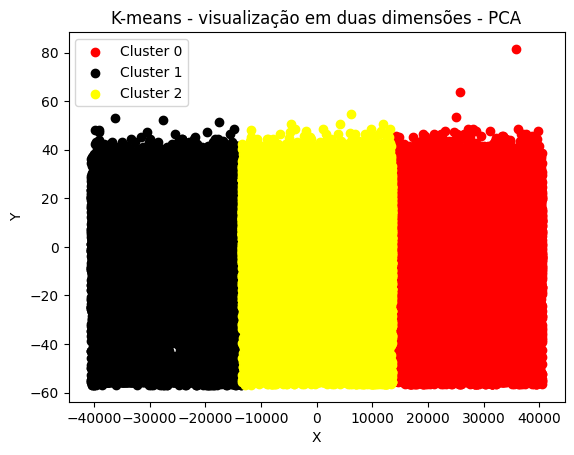

In [98]:
cluster_0 = x_df[x_df['cluster'] == 0]
cluster_1 = x_df[x_df['cluster'] == 1]
cluster_2 = x_df[x_df['cluster'] == 2]

plt.scatter(cluster_0['X'], cluster_0['Y'], c="red",label = 'Cluster 0')
plt.scatter(cluster_1['X'], cluster_1['Y'], c="black",label = 'Cluster 1')
plt.scatter(cluster_2['X'], cluster_2['Y'], c="yellow",label = 'Cluster 2')

plt.legend()
plt.title('K-means - visualização em duas dimensões - PCA')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [68]:
cluster_2

,UF,SEXO,IDADE,DIABETES,NEURO,OBESIDADE,MORBI,VACINADO,CLASS_FINAL,EVOLUIDO,RACA,ESCOLARIDADE,RES_SORO,REGIAO,PERIODO,cluster,X,Y
26917,15,1,82,1.0,0.0,1.0,0.0,9.0,5.0,2.0,1.0,0.0,2.0,1,1.0,2,13581.001181,25.596820
26918,15,2,38,0.0,0.0,0.0,0.0,2.0,5.0,1.0,4.0,4.0,2.0,1,1.0,2,13580.001477,-18.527437
26919,15,2,81,2.0,2.0,2.0,2.0,2.0,4.0,2.0,4.0,0.0,9.0,1,2.0,2,13579.001246,24.502616
26920,15,1,73,1.0,0.0,0.0,0.0,0.0,4.0,2.0,1.0,3.0,1.0,1,2.0,2,13578.001238,16.470671
26921,15,1,85,2.0,2.0,2.0,9.0,2.0,5.0,2.0,4.0,9.0,9.0,1,1.0,2,13577.001235,28.547436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53911,42,1,68,1.0,2.0,2.0,2.0,2.0,5.0,1.0,1.0,0.0,0.0,2,2.0,2,-13413.000774,11.368557
53912,42,2,86,1.0,2.0,2.0,1.0,2.0,5.0,1.0,1.0,1.0,2.0,2,2.0,2,-13414.000866,29.345549
53913,42,1,71,0.0,0.0,0.0,0.0,2.0,5.0,1.0,1.0,1.0,1.0,2,1.0,2,-13415.000788,14.298875
53914,42,2,52,0.0,0.0,0.0,0.0,2.0,5.0,2.0,1.0,3.0,1.0,2,2.0,2,-13416.000688,-4.690052


<Axes: xlabel='cluster', ylabel='EVOLUIDO'>

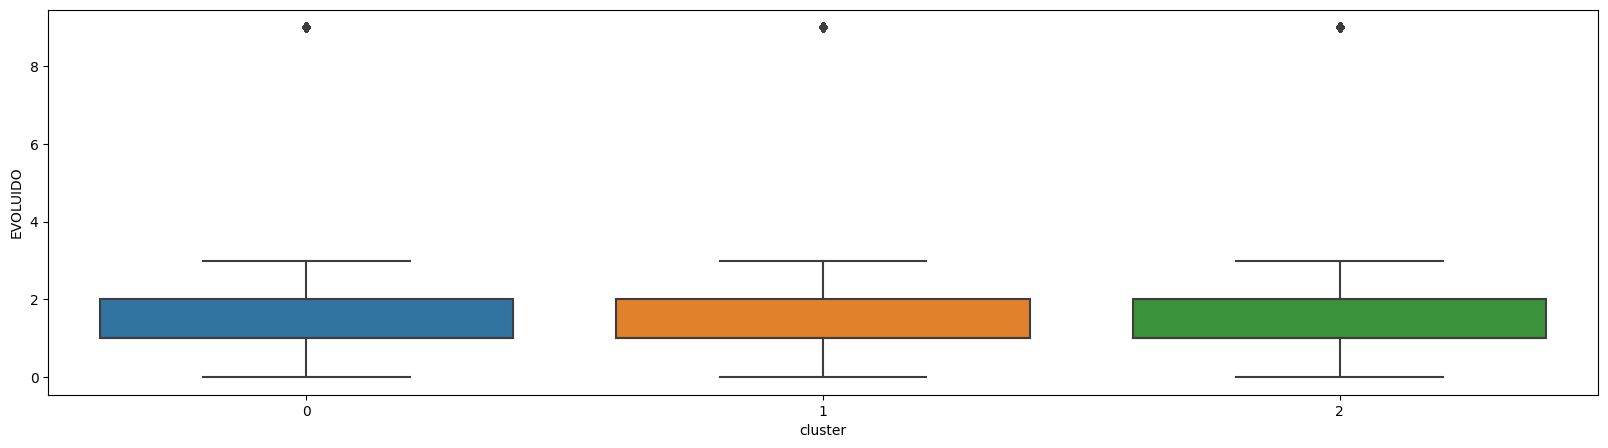

In [69]:
plt.figure(figsize=(20, 5))
sns.boxplot( x=x_df["cluster"], y=x_df["EVOLUIDO"] )

<Axes: xlabel='cluster', ylabel='CLASS_FINAL'>

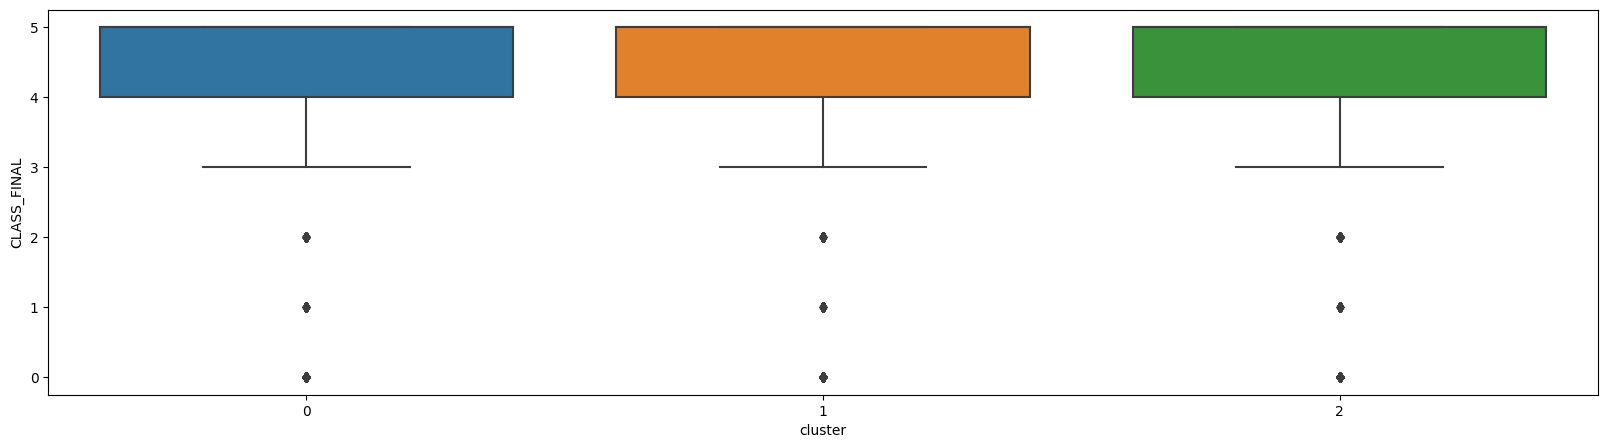

In [70]:
plt.figure(figsize=(20, 5))
sns.boxplot( x=x_df["cluster"], y=x_df["CLASS_FINAL"] )

<Axes: xlabel='cluster', ylabel='RES_SORO'>

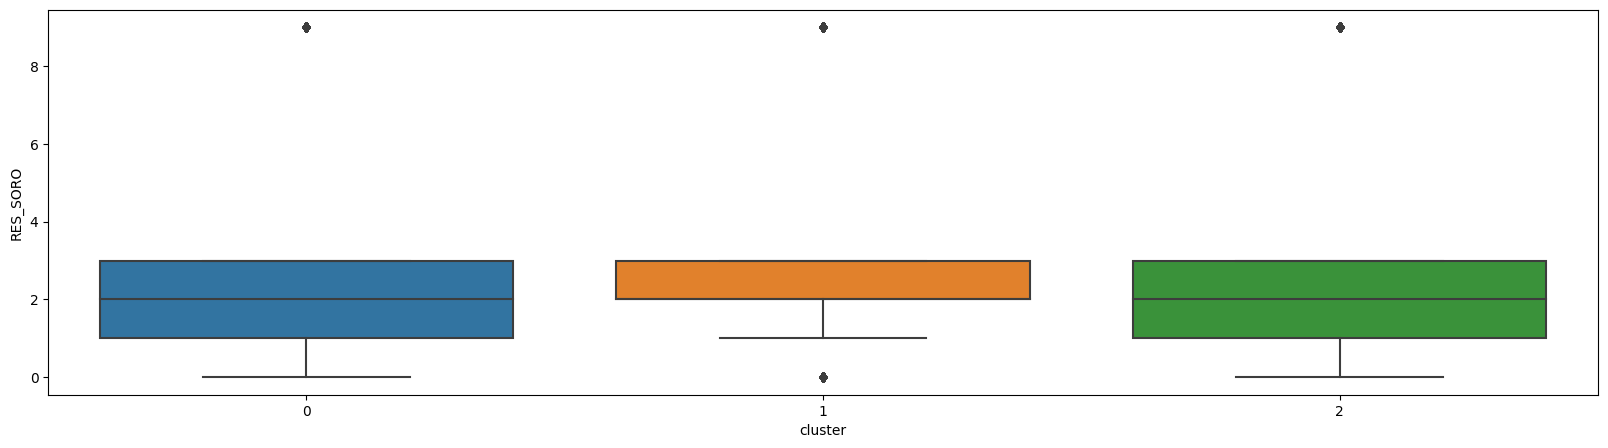

In [71]:
plt.figure(figsize=(20, 5))
sns.boxplot( x=x_df["cluster"], y=x_df["RES_SORO"] )

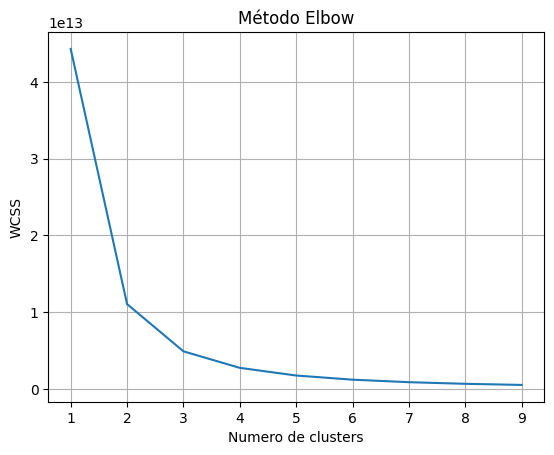

In [72]:
wcss = []
for i in range(1,10):
  kmeans = KMeans(n_clusters=i, init = 'k-means++', max_iter = 300, random_state = 42)
  kmeans.fit(results)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,10), wcss)
plt.title('Método Elbow')
plt.xlabel('Numero de clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show();

In [73]:
kmeans_model = KMeans(n_clusters=3, init = 'k-means++', max_iter = 300, random_state = 42)
y_kmeans2 = kmeans_model.fit_predict(results)

from sklearn.metrics import silhouette_score
silhouette_score(results, y_kmeans2)

0.5901746764944972

In [107]:
cluster_0.describe()

,UF,SEXO,IDADE,DIABETES,NEURO,OBESIDADE,MORBI,VACINADO,CLASS_FINAL,EVOLUIDO,RACA,ESCOLARIDADE,RES_SORO,REGIAO,PERIODO,cluster,X,Y
count,26917.00000,26917.000000,26917.000000,26917.000000,26917.000000,26917.000000,26917.000000,26917.000000,26917.000000,26917.000000,26917.000000,26917.000000,26917.000000,26917.000000,26917.000000,26917.0,26917.000000,26917.000000
mean,32.52060,1.455326,56.142921,0.841959,0.918304,0.953858,0.777724,4.026526,4.408441,1.383624,3.930081,3.864955,2.166586,3.618791,1.556563,0.0,27039.999987,-0.302423
std,12.66355,0.526724,22.887254,1.108099,1.257188,1.398850,1.091877,3.849337,1.063408,1.238601,2.593306,3.871804,1.764891,1.260436,0.547123,0.0,7770.413321,22.895564
min,12.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,13582.001395,-56.627349
25%,23.00000,1.000000,41.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,1.000000,2.000000,0.000000,1.000000,3.000000,1.000000,0.0,20311.000178,-15.326896
50%,31.00000,1.000000,59.000000,1.000000,0.000000,0.000000,0.000000,2.000000,5.000000,1.000000,4.000000,3.000000,2.000000,4.000000,2.000000,0.0,27039.998341,2.800949
75%,50.00000,2.000000,74.000000,2.000000,2.000000,2.000000,1.000000,9.000000,5.000000,2.000000,4.000000,9.000000,3.000000,5.000000,2.000000,0.0,33769.000885,17.411857
max,53.00000,10.000000,138.000000,9.000000,9.000000,9.000000,9.000000,9.000000,5.000000,9.000000,9.000000,9.000000,9.000000,5.000000,2.000000,0.0,40498.001472,81.491207


In [108]:
cluster_1.describe()

,UF,SEXO,IDADE,DIABETES,NEURO,OBESIDADE,MORBI,VACINADO,CLASS_FINAL,EVOLUIDO,RACA,ESCOLARIDADE,RES_SORO,REGIAO,PERIODO,cluster,X,Y
count,27081.000000,27081.000000,27081.000000,27081.000000,27081.000000,27081.000000,27081.000000,27081.000000,27081.000000,27081.000000,27081.000000,27081.000000,27081.000000,27081.000000,27081.000000,27081.0,27081.000000,27081.000000
mean,34.812747,1.454193,56.098852,0.815812,0.892877,0.930025,0.770540,4.033714,4.477050,1.377682,2.872937,3.682139,2.165319,2.962335,1.500942,1.0,-26958.000039,-0.615238
std,3.079843,0.500569,22.370474,1.124674,1.299049,1.450595,1.134561,3.815357,0.822055,1.203041,2.860518,3.721846,1.563393,0.459978,0.586726,0.0,7817.755560,22.378154
min,17.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0,-40497.998574,-56.873824
25%,35.000000,1.000000,42.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,1.000000,1.000000,0.000000,2.000000,3.000000,1.000000,1.0,-33728.000079,-14.629570
50%,35.000000,1.000000,59.000000,0.000000,0.000000,0.000000,0.000000,2.000000,5.000000,1.000000,1.000000,3.000000,2.000000,3.000000,2.000000,1.0,-26957.999865,2.308468
75%,35.000000,2.000000,73.000000,2.000000,2.000000,2.000000,1.000000,9.000000,5.000000,2.000000,4.000000,9.000000,3.000000,3.000000,2.000000,1.0,-20187.999970,16.198472
max,42.000000,10.000000,110.000000,9.000000,9.000000,9.000000,9.000000,9.000000,5.000000,9.000000,9.000000,9.000000,9.000000,5.000000,2.000000,1.0,-13418.000712,53.241277


In [109]:
cluster_2.describe()

,UF,SEXO,IDADE,DIABETES,NEURO,OBESIDADE,MORBI,VACINADO,CLASS_FINAL,EVOLUIDO,RACA,ESCOLARIDADE,RES_SORO,REGIAO,PERIODO,cluster,X,Y
count,26999.000000,26999.000000,26999.000000,26999.000000,26999.000000,26999.000000,26999.000000,26999.000000,26999.000000,26999.000000,26999.000000,26999.000000,26999.000000,26999.00000,26999.000000,26999.0,26999.000000,26999.000000
mean,32.588985,1.463165,57.497944,0.735694,0.769177,0.799844,0.680359,4.238972,4.478796,1.376458,3.529871,3.931849,2.046594,3.03815,1.546613,2.0,82.000052,0.918611
std,8.485342,0.514445,22.356468,1.092810,1.253922,1.359821,1.028584,3.995294,0.936332,1.253038,3.035165,3.904106,1.774821,1.30387,0.546900,0.0,7794.084659,22.358393
min,11.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,2.0,-13417.000430,-56.715913
25%,26.000000,1.000000,44.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,1.000000,1.000000,0.000000,1.000000,2.00000,1.000000,2.0,-6667.499968,-12.576009
50%,33.000000,1.000000,61.000000,0.000000,0.000000,0.000000,0.000000,2.000000,5.000000,1.000000,3.000000,3.000000,2.000000,3.00000,2.000000,2.0,81.999930,4.450995
75%,41.000000,2.000000,74.000000,1.000000,2.000000,2.000000,1.000000,9.000000,5.000000,2.000000,4.000000,9.000000,3.000000,5.00000,2.000000,2.0,6831.500865,17.433446
max,43.000000,10.000000,111.000000,9.000000,9.000000,9.000000,9.000000,9.000000,5.000000,9.000000,9.000000,9.000000,9.000000,5.00000,2.000000,2.0,13581.001181,54.514270
